# Predicting Depression (Mental Health)

In [29]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (train_test_split,GridSearchCV, StratifiedKFold)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.metrics import ( classification_report, 
                            accuracy_score, confusion_matrix,
                            ConfusionMatrixDisplay, roc_curve,  
                                roc_auc_score, auc )

### Loading Data

In [30]:
df = pd.read_csv('train.csv')
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [31]:
#Renaming Long Columns
df.rename(columns= {'Working Professional or Student':'WP or S','Have you ever had suicidal thoughts ?':'Suicidal Thoughts',
                   'Family History of Mental Illness':'Family History'}, inplace=True)
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City', 'WP or S', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal Thoughts', 'Work/Study Hours', 'Financial Stress',
       'Family History', 'Depression'],
      dtype='object')

In [32]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  140700 non-null  int64  
 1   Name                140700 non-null  object 
 2   Gender              140700 non-null  object 
 3   Age                 140700 non-null  float64
 4   City                140700 non-null  object 
 5   WP or S             140700 non-null  object 
 6   Profession          104070 non-null  object 
 7   Academic Pressure   27897 non-null   float64
 8   Work Pressure       112782 non-null  float64
 9   CGPA                27898 non-null   float64
 10  Study Satisfaction  27897 non-null   float64
 11  Job Satisfaction    112790 non-null  float64
 12  Sleep Duration      140700 non-null  object 
 13  Dietary Habits      140696 non-null  object 
 14  Degree              140698 non-null  object 
 15  Suicidal Thoughts   140700 non-nul

### Data Cleaning

In [34]:
#Checking for Missing Values
df.isnull().sum()

id                         0
Name                       0
Gender                     0
Age                        0
City                       0
WP or S                    0
Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Sleep Duration             0
Dietary Habits             4
Degree                     2
Suicidal Thoughts          0
Work/Study Hours           0
Financial Stress           4
Family History             0
Depression                 0
dtype: int64

Understanding Data

In [35]:
profession = df["Profession"].unique().tolist()
profession , len(profession)

(['Chef',
  'Teacher',
  nan,
  'Business Analyst',
  'Finanancial Analyst',
  'Chemist',
  'Electrician',
  'Software Engineer',
  'Data Scientist',
  'Plumber',
  'Marketing Manager',
  'Accountant',
  'Entrepreneur',
  'HR Manager',
  'UX/UI Designer',
  'Content Writer',
  'Educational Consultant',
  'Civil Engineer',
  'Manager',
  'Pharmacist',
  'Financial Analyst',
  'Architect',
  'Mechanical Engineer',
  'Customer Support',
  'Consultant',
  'Judge',
  'Researcher',
  'Pilot',
  'Graphic Designer',
  'Travel Consultant',
  'Digital Marketer',
  'Lawyer',
  'Research Analyst',
  'Sales Executive',
  'Doctor',
  'Unemployed',
  'Investment Banker',
  'Family Consultant',
  'B.Com',
  'BE',
  'Student',
  'Yogesh',
  'Dev',
  'MBA',
  'LLM',
  'BCA',
  'Academic',
  'Profession',
  'FamilyVirar',
  'City Manager',
  'BBA',
  'Medical Doctor',
  'Working Professional',
  'MBBS',
  'Patna',
  'Unveil',
  'B.Ed',
  'Nagpur',
  'Moderate',
  'M.Ed',
  'Analyst',
  'Pranav',
  'Visak

In [36]:
sleep = df["Sleep Duration"].unique().tolist()
sleep , len(sleep)

(['More than 8 hours',
  'Less than 5 hours',
  '5-6 hours',
  '7-8 hours',
  'Sleep_Duration',
  '1-2 hours',
  '6-8 hours',
  '4-6 hours',
  '6-7 hours',
  '10-11 hours',
  '8-9 hours',
  '40-45 hours',
  '9-11 hours',
  '2-3 hours',
  '3-4 hours',
  'Moderate',
  '55-66 hours',
  '4-5 hours',
  '9-6 hours',
  '1-3 hours',
  'Indore',
  '45',
  '1-6 hours',
  '35-36 hours',
  '8 hours',
  'No',
  '10-6 hours',
  'than 5 hours',
  '49 hours',
  'Unhealthy',
  'Work_Study_Hours',
  '3-6 hours',
  '45-48 hours',
  '9-5',
  'Pune',
  '9-5 hours'],
 36)

In [37]:
diet = df["Dietary Habits"].unique().tolist()
diet , len(diet)

(['Healthy',
  'Unhealthy',
  'Moderate',
  'Yes',
  'Pratham',
  'BSc',
  'Gender',
  '3',
  'More Healthy',
  'Less than Healthy',
  'Mihir',
  '1.0',
  'Hormonal',
  'Electrician',
  nan,
  'No Healthy',
  'Less Healthy',
  'M.Tech',
  'Vegas',
  'No',
  'Male',
  'Indoor',
  'Class 12',
  '2'],
 24)

In [38]:
degree = df["Degree"].unique().tolist()
degree, len(degree)

(['BHM',
  'LLB',
  'B.Pharm',
  'BBA',
  'MCA',
  'MD',
  'BSc',
  'ME',
  'B.Arch',
  'BCA',
  'BE',
  'MA',
  'B.Ed',
  'B.Com',
  'MBA',
  'M.Com',
  'MHM',
  'BA',
  'Class 12',
  'M.Tech',
  'PhD',
  'M.Ed',
  'MSc',
  'B.Tech',
  'LLM',
  'MBBS',
  'M.Pharm',
  'UX/UI Designer',
  'MPA',
  'BH',
  'Nalini',
  'BEd',
  'B.Sc',
  'Veda',
  'Bhopal',
  'S.Tech',
  'Degree',
  '20',
  'Class 11',
  'H_Pharm',
  'M',
  'P.Com',
  'BPharm',
  'Business Analyst',
  'M.Arch',
  'LL.Com',
  'Data Scientist',
  'MPharm',
  'L.Ed',
  'P.Pharm',
  'Kalyan',
  'Unite',
  'BArch',
  'HR Manager',
  'Badhya',
  'S.Pharm',
  'LLBA',
  'Vrinda',
  'M. Business Analyst',
  'Bhavesh',
  '0',
  'LLCom',
  '29',
  'MTech',
  'Vivaan',
  'BPA',
  'Plumber',
  '5.61',
  'Brit',
  'B.03',
  'Ritik',
  '5.56',
  'MEd',
  'B',
  'B BA',
  '7.06',
  'B.B.Arch',
  'ACA',
  'Brithika',
  'CGPA',
  '24',
  'M_Tech',
  'Pihu',
  'BB',
  'Jhanvi',
  'LLTech',
  'Aarav',
  'Entrepreneur',
  '8.56',
  'LHM',
  '

Feature Engineering

In [39]:
# Merging 'Study Satisfaction' and 'Job Satisfaction' into one column
df['Satisfaction'] = df['Study Satisfaction'].fillna(df['Job Satisfaction'])

# Dropping the original columns if no longer needed
df.drop(columns=['Study Satisfaction', 'Job Satisfaction'], inplace=True)

# Merging 'Academic Pressure' and 'Work Pressure' into one column
df['Pressure'] = df['Academic Pressure'].fillna(df['Work Pressure'])

# Dropping the original columns if no longer needed
df.drop(columns=['Academic Pressure', 'Work Pressure'], inplace=True)

# Verifying the changes
df.head()

,id,Name,Gender,Age,City,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression,Satisfaction,Pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [40]:
# Dropping the 'Name' and 'City' columns
df.drop(columns=['Name', 'City'], inplace=True)

# Verifying the columns have been dropped
df.head()

,id,Gender,Age,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression,Satisfaction,Pressure
0,0,Female,49.0,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,1,Male,26.0,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,2,Male,33.0,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,3,Male,22.0,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,4,Female,30.0,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


Categorical Values to Numerical

In [41]:
df['Gender'] = df['Gender'].replace({'Female': 0,'Male': 1})
df['WP or S'] = df['WP or S'].replace({'Student': 0, 'Working Professional': 1})
df['Suicidal Thoughts'] = df['Suicidal Thoughts'].replace({'No': 0, 'Yes': 1})
df['Family History'] = df['Family History'].replace({'No': 0, 'Yes': 1})

# Replace categorical values with numeric ones
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})
df['Dietary Habits'] = pd.to_numeric(df['Dietary Habits'], errors='coerce')
# Filling Dietary Habits with the mode
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])

# Display the updated DataFrame
df.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\2351655312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0,'Male': 1})
C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\2351655312.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WP or S'] = df['WP or S'].replace({'Student': 0, 'Working Professional': 1})
C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\2351655312.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

,id,Gender,Age,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression,Satisfaction,Pressure
0,0,0,49.0,1,Chef,NaN,More than 8 hours,2.0,BHM,0,1.0,2.0,0,0,2.0,5.0
1,1,1,26.0,1,Teacher,NaN,Less than 5 hours,0.0,LLB,1,7.0,3.0,0,1,3.0,4.0
2,2,1,33.0,0,NaN,8.97,5-6 hours,2.0,B.Pharm,1,3.0,1.0,0,1,2.0,5.0
3,3,1,22.0,1,Teacher,NaN,Less than 5 hours,1.0,BBA,1,10.0,1.0,1,1,1.0,5.0
4,4,0,30.0,1,Business Analyst,NaN,5-6 hours,0.0,BBA,1,9.0,4.0,1,0,1.0,1.0


In [42]:
#Profession Levels
# 0= Unemployed/Unkown
# 1= Entry level jobs
# 2= Mid Level jobs
# 3= Senior level jobs
# 4= Managerial level/Entrepreneur

df["Profession"] = df["Profession"].fillna("No_Profession")

professional_level = {
  'Chef': 1,
  'Teacher': 2,
  'Student' : 1,
  'Business Analyst' : 2,
  'Finanancial Analyst' : 2,
  'Chemist' : 3,
  'Electrician': 1,
  'Software Engineer' : 3,
  'Data Scientist' : 3,
  'Plumber' : 1,
  'Marketing Manager': 4,
  'Accountant' : 3,
  'Entrepreneur': 6,
  'HR Manager' : 4,
  'UX/UI Designer' : 2,
  'Content Writer': 1,
  'No_Profession': 0,
  'Educational Consultant' : 3,
  'Civil Engineer' : 3,
  'Manager': 4,
  'Pharmacist' : 3,
  'Financial Analyst' : 2,
  'Architect': 3,
  'Mechanical Engineer' : 3,
  'Customer Support' : 1,
  'Consultant': 4,
  'Judge': 4,
  'Researcher': 3,
  'Pilot': 4,
  'Graphic Designer': 1,
  'Travel Consultant': 2,
  'Digital Marketer' : 1,
  'Lawyer': 5,
  'Research Analyst' :3,
  'Sales Executive' : 1,
  'Doctor' : 4,
  'Unemployed' : 0,
  'Investment Banker' : 4,
  'Family Consultant' : 4,
  'B.Com': 2,
  'BE': 2,
  'Yogesh' : 0,
  'Dev': 3,
  'MBA' : 3,
  'LLM': 3,
  'BCA': 2,
  'Academic' : 2,
  'Profession': 0,
  'FamilyVirar': 0,
  'City Manager' : 4,
  'BBA': 2,
  'Medical Doctor': 3,
  'Working Professional':2,
  'MBBS': 2,
  'Patna' : 0,
  'Unveil' : 1,
  'B.Ed' : 1,
  'Nagpur' : 0,
  'Moderate': 3,
  'M.Ed': 2,
  'Analyst': 2,
  'Pranav':0,
  'Visakhapatnam' :0 ,
  'PhD' : 4,
  'Yuvraj': 0,    
}

In [43]:
#Sleep Duration

#Assumed over 30 hours to be wekly hence divided by seven
sleep_time ={  
    'More than 8 hours' : 9 ,
    'Less than 5 hours': 4,
    '5-6 hours' : 5.5,
    '7-8 hours' : 7.5,
    'Sleep_Duration': None,
    '1-2 hours' :1.5 ,
    '6-8 hours' : 7,
    '4-6 hours' : 5,
    '6-7 hours': 6.5,
    '10-11 hours' : 10.5,
    '8-9 hours' :8.5,
    '40-45 hours' : 6,
    '9-11 hours' : 10 ,
    '2-3 hours' : 2.5,
    '3-4 hours' : 3.5,
    'Moderate' : 6,
    '55-66 hours': 8,
    '4-5 hours' : 4.5,
    '9-6 hours' : 7.5,
    '1-3 hours' : 2,
    'Indore': None,
    '45' : 45,
    '1-6 hours' : 4,
    '35-36 hours' : 5,
    '8 hours' : 8,
    'No' : None,
    '10-6 hours' : 8 ,
    'than 5 hours' : 4, 
    '49 hours' : 7,
    'Unhealthy' : 3,
    'Work_Study_Hours' : 6,
    '3-6 hours': 5,
    '45-48 hours' : 6.5,
    '9-5': 7,
    'Pune' : None, 
    '9-5 hours': 7,
}

In [44]:
#Degree
# 0= No School
# 1= Highschool
# 2= Undergrad
# 3= Grad
# 4= Phd

#Filling Degree and Profession with fillna value 
df["Degree"] = df["Degree"].fillna("No_Degree")

degree_level = {
  'BHM' : 2,
  'LLB' : 2,
  'B.Pharm' : 2,
  'BBA' : 2,
  'MCA': 3,
  'MD' : 3,
  'BSc': 2,
  'ME' : 3,
  'B.Arch': 2,
  'BCA' : 2,
  'BE': 2,
  'MA' : 3,
  'B.Ed' : 2,
  'B.Com' : 2,
  'MBA' : 3,
  'M.Com' : 3,
  'MHM' : 3,
  'BA' : 2,
  'Class 12' : 1,
  'M.Tech': 3,
  'PhD' : 4,
  'M.Ed': 3,
  'MSc': 3,
  'B.Tech': 2,
  'LLM' : 3,
  'MBBS': 3,
  'M.Pharm': 3,
  'UX/UI Designer' : 1,
  'MPA' : 3,
  'BH' : 2,
  'Nalini': 0,
  'BEd': 2,
  'B.Sc' : 2,
  'Veda': 0,
  'Bhopal': 0,
  'S.Tech' :1,
  'Degree': 2,
  '20' : 0,
  'Class 11': 1,
  'H_Pharm': 2,
  'M' : 3,
  'P.Com': 2,
  'BPharm' : 2,
  'Business Analyst' : 2,
  'M.Arch': 3,
  'LL.Com' : 2 ,
  'Data Scientist' : 3,
  'MPharm': 3,
  'L.Ed': 0 ,
  'P.Pharm' : 2,
  'Kalyan': 0,
  'Unite': 0,
  'BArch': 2,
  'HR Manager': 3,
  'Badhya':0 ,
  'S.Pharm': 2,
  'LLBA': 2,
  'Vrinda': 0,
  'M. Business Analyst' : 3,
  'Bhavesh' :0,
  '0' : 0,
  'LLCom': 2,
  '29' : 0,
  'MTech': 3,
  'Vivaan':0,
  'BPA': 2,
  'Plumber': 1,
  '5.61' : 0,
  'Brit': 0,
  'B.03' : 0,
  'Ritik': 0,
  '5.56': 0,
  'MEd': 3,
  'B': 2,
  'B BA': 2,
  '7.06': 0,
  'B.B.Arch': 2,
  'ACA' : 2,
  'Brithika': 0,
  'CGPA': 2,
  '24': 0,
  'M_Tech': 3,
  'Pihu':0,
  'BB': 2,
  'Jhanvi' : 0,
  'LLTech': 2,
  'Aarav': 0,
  'Entrepreneur': 3,
  '8.56': 0 ,
  'LHM': 1,
  'Lata': 0,
  'S.Arch': 3,
  'Marsh':0 ,
  'HCA': 2,
  '5.88': 0,
  'B.Student': 2,
  'LL B.Ed': 2,
  'M.S': 3,
  'Navya': 0,
  'Mahika' : 0,
  'No_Degree': 0,
  'K.Ed': 1,
  'B.3.79': 0,
  'Mthanya' : 0 ,
  'Working Professional' : 2,
  'Esha': 0,
  'LLS' : 2,
  'LLEd': 2,
  'E.Tech': 1,
  'Doctor' : 4,
  'N.Pharm': 2,
  'LCA': 2,
  'B B.Com' : 2,
  'RCA': 2,
  'Mihir': 0,
  'Advait': 0,
}

In [45]:
# Apply the mappings to the respective columns
df['Profession'] = df['Profession'].replace(professional_level)
df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_time)
df['Degree'] = df['Degree'].replace(degree_level)

# Verify the changes
df.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\3907560248.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Profession'] = df['Profession'].replace(professional_level)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\3907560248.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_time)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\3907560248.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

,id,Gender,Age,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression,Satisfaction,Pressure
0,0,0,49.0,1,1,NaN,9.0,2.0,2,0,1.0,2.0,0,0,2.0,5.0
1,1,1,26.0,1,2,NaN,4.0,0.0,2,1,7.0,3.0,0,1,3.0,4.0
2,2,1,33.0,0,0,8.97,5.5,2.0,2,1,3.0,1.0,0,1,2.0,5.0
3,3,1,22.0,1,2,NaN,4.0,1.0,2,1,10.0,1.0,1,1,1.0,5.0
4,4,0,30.0,1,2,NaN,5.5,0.0,2,1,9.0,4.0,1,0,1.0,1.0


Filling Blank Spaces

In [46]:
#Checking for Missing Values
df.isnull().sum()

id                        0
Gender                    0
Age                       0
WP or S                   0
Profession                0
CGPA                 112802
Sleep Duration            8
Dietary Habits            0
Degree                    0
Suicidal Thoughts         0
Work/Study Hours          0
Financial Stress          4
Family History            0
Depression                0
Satisfaction             15
Pressure                 21
dtype: int64

In [47]:
#Filling Fincanical stress with median() 
df["Financial Stress"] = df["Financial Stress"].fillna(df["Financial Stress"].median())

#Filling Satisfaction with Median
df["Satisfaction"] =  df["Satisfaction"].fillna(df["Satisfaction"].median())

#Filling Pressure with Median
df["Pressure"] =  df["Pressure"].fillna(df["Pressure"].median())

#Filling Sleep Duration with Median
df["Sleep Duration"] =  df["Sleep Duration"].fillna(df["Sleep Duration"].median())

# Fillna CFPA for -1
df["CGPA"] = df["CGPA"].fillna(-1)


In [48]:
#Checking for Missing Values
df.isnull().sum()

id                   0
Gender               0
Age                  0
WP or S              0
Profession           0
CGPA                 0
Sleep Duration       0
Dietary Habits       0
Degree               0
Suicidal Thoughts    0
Work/Study Hours     0
Financial Stress     0
Family History       0
Depression           0
Satisfaction         0
Pressure             0
dtype: int64

### Visualizations

Correlation Matrix

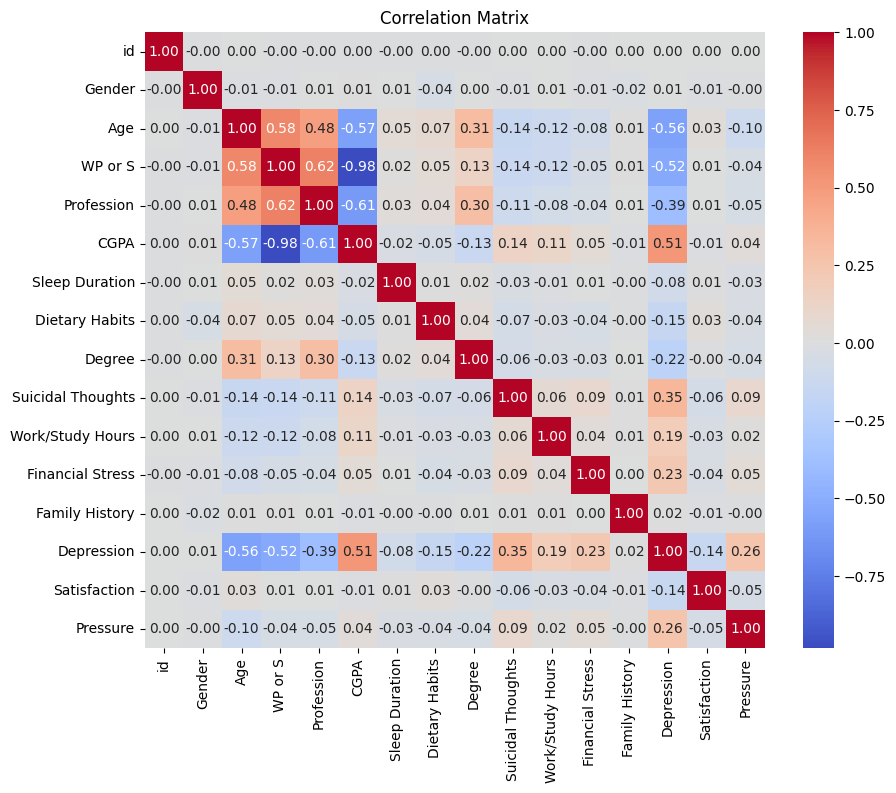

Features most correlated with Depression:
Depression           1.000000
CGPA                 0.514080
Suicidal Thoughts    0.349066
Pressure             0.263452
Financial Stress     0.227232
Work/Study Hours     0.191746
Family History       0.016502
Gender               0.008144
id                   0.003944
Sleep Duration      -0.079242
Satisfaction        -0.142314
Dietary Habits      -0.148811
Degree              -0.215457
Profession          -0.393569
WP or S             -0.520790
Age                 -0.564671
Name: Depression, dtype: float64


In [49]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Focus on the correlation with the 'Depression' column
correlation_with_depression = correlation_matrix['Depression'].sort_values(ascending=False)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Print the features most correlated with depression
print("Features most correlated with Depression:")
print(correlation_with_depression)

Depression Distribution

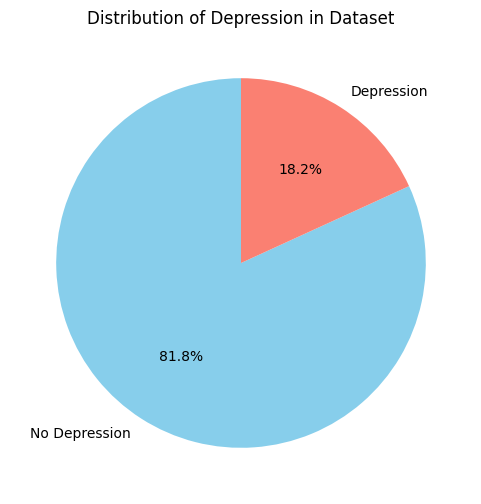

In [50]:
# Count the occurrences of each class in the 'Depression' column
depression_counts = df['Depression'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(depression_counts, labels=['No Depression', 'Depression'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Depression in Dataset')
plt.show()

Depressed Genders

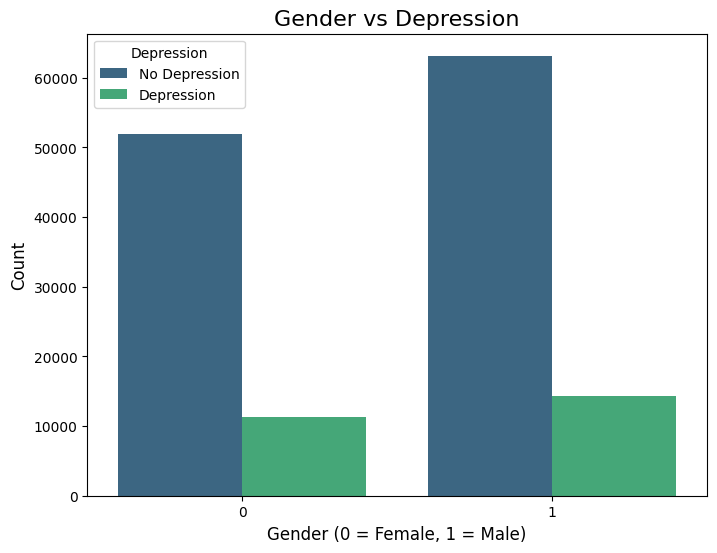

In [51]:
# Create a bar plot for Gender vs Depression
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Depression', palette='viridis')

# Add labels and title
plt.title('Gender vs Depression', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Depression', labels=['No Depression', 'Depression'])
plt.show()

Suicidal Thoughts

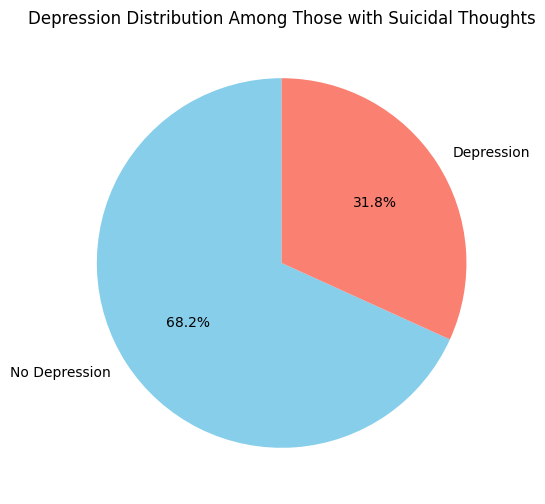

In [52]:
# Filter the dataset for those with suicidal thoughts
suicidal_thoughts = df[df['Suicidal Thoughts'] == 1]

# Count the occurrences of depression among those with suicidal thoughts
depression_counts = suicidal_thoughts['Depression'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(depression_counts, labels=['No Depression', 'Depression'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Depression Distribution Among Those with Suicidal Thoughts')
plt.show()

Family History of Depression

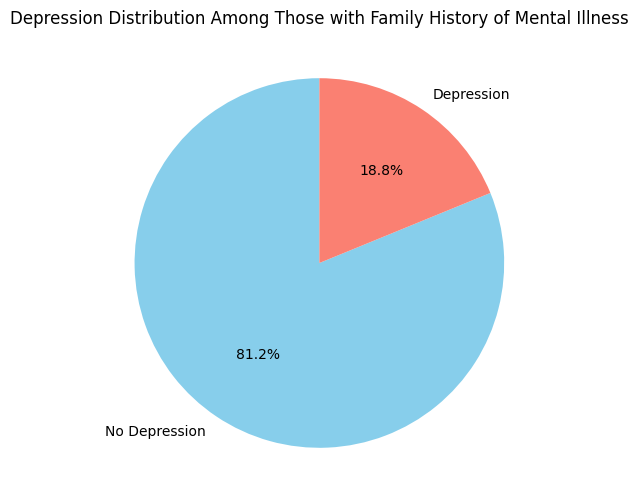

In [53]:
# Filter the dataset for those with a family history of mental illness
family_history = df[df['Family History'] == 1]

# Count the occurrences of depression among those with a family history
depression_counts = family_history['Depression'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(depression_counts, labels=['No Depression', 'Depression'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Depression Distribution Among Those with Family History of Mental Illness')
plt.show()

### Modeling

In [54]:
#Defining Features and Target
X = df.drop(['Depression'],axis=1) 
y = df['Depression']
X.head()

,id,Gender,Age,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Satisfaction,Pressure
0,0,0,49.0,1,1,-1.00,9.0,2.0,2,0,1.0,2.0,0,2.0,5.0
1,1,1,26.0,1,2,-1.00,4.0,0.0,2,1,7.0,3.0,0,3.0,4.0
2,2,1,33.0,0,0,8.97,5.5,2.0,2,1,3.0,1.0,0,2.0,5.0
3,3,1,22.0,1,2,-1.00,4.0,1.0,2,1,10.0,1.0,1,1.0,5.0
4,4,0,30.0,1,2,-1.00,5.5,0.0,2,1,9.0,4.0,1,1.0,1.0


In [55]:
print(X.dtypes)

id                     int64
Gender                 int64
Age                  float64
WP or S                int64
Profession             int64
CGPA                 float64
Sleep Duration       float64
Dietary Habits       float64
Degree                 int64
Suicidal Thoughts      int64
Work/Study Hours     float64
Financial Stress     float64
Family History         int64
Satisfaction         float64
Pressure             float64
dtype: object


In [57]:
#Performing SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [58]:
#Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled

array([[-1.73455991, -0.92109316,  1.15345585, ..., -0.828671  ,
        -0.61322229,  1.27473102],
       [-1.73453528,  1.08566652, -0.67478589, ..., -0.828671  ,
         0.14663448,  0.5121233 ],
       [-1.73451065,  1.08566652, -0.11836449, ..., -0.828671  ,
        -0.61322229,  1.27473102],
       ...,
       [-1.42668101,  1.08566652, -0.97932384, ..., -0.828671  ,
         0.64997441, -0.62692385],
       [ 1.48717196, -0.92109316,  0.40715346, ...,  1.20675153,
        -1.37307906,  1.09993492],
       [ 1.60509245,  1.08566652, -0.69342504, ..., -0.828671  ,
        -0.88152957,  0.28807288]], shape=(230266, 15))

In [59]:
#Splitting our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state=42)

Model Selection

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
log_roc_auc = round(roc_auc_score(Y_pred, y_test)* 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print("ROC AUC Score       :",log_roc_auc)

Training Accuracy    : 93.73
Model Accuracy Score : 94.01
ROC AUC Score       : 94.02


In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
decision_roc_auc = round(roc_auc_score(Y_pred, y_test)* 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print("ROC AUC Score       :",decision_roc_auc)

Training Accuracy    : 93.73
Model Accuracy Score : 94.01
ROC AUC Score       : 93.79


In [62]:
#XGBoost
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
xgb_roc_auc = round(roc_auc_score(Y_pred, y_test)* 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print("ROC AUC Score       :",xgb_roc_auc)

Training Accuracy    : 93.73
Model Accuracy Score : 94.01
ROC AUC Score       : 96.23


In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
random_roc_auc = round(roc_auc_score(Y_pred, y_test)* 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print("ROC AUC Score       :",random_roc_auc)

Training Accuracy    : 93.73
Model Accuracy Score : 94.01
ROC AUC Score       : 96.13


Model Selection

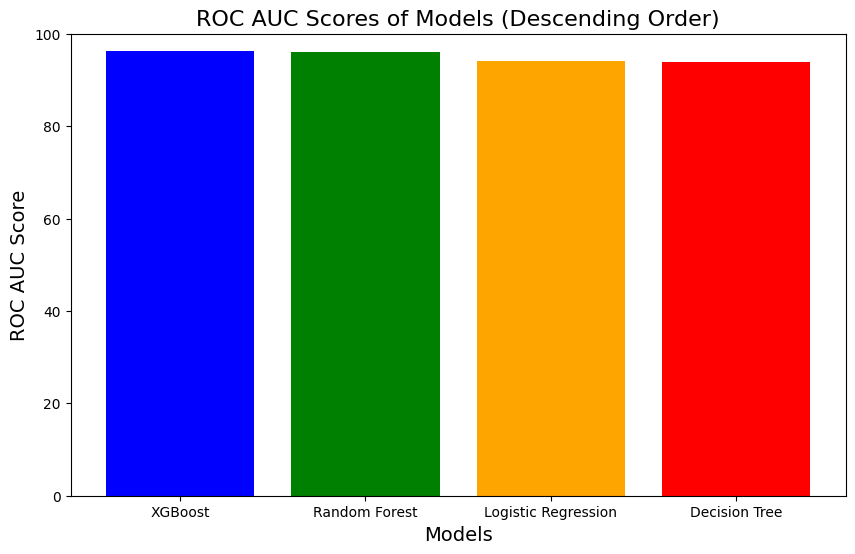

In [64]:

# Define the models and their ROC AUC scores
models = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Random Forest']
roc_auc_scores = [log_roc_auc, decision_roc_auc, xgb_roc_auc, random_roc_auc]

# Sort models and scores in descending order of ROC AUC scores
sorted_indices = sorted(range(len(roc_auc_scores)), key=lambda i: roc_auc_scores[i], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_scores = [roc_auc_scores[i] for i in sorted_indices]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('ROC AUC Scores of Models (Descending Order)', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.ylim(0, 100)  # Assuming scores are percentages
plt.show()

Hyparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV
import xgboost as Xgb

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],          # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5]               # Minimum loss reduction required to make a further partition
}

# Initialize the XGBoost model
xgb = Xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Use the best model for predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:43:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best ROC AUC Score: 0.9942160547629811


Test Dataset

In [80]:
#Loading Test Dataset
test_df = pd.read_csv('test.csv')

In [81]:
#Renaming Long Columns
test_df.rename(columns= {'Working Professional or Student':'WP or S','Have you ever had suicidal thoughts ?':'Suicidal Thoughts',
                   'Family History of Mental Illness':'Family History'}, inplace=True)
test_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City', 'WP or S', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal Thoughts', 'Work/Study Hours', 'Financial Stress',
       'Family History'],
      dtype='object')

In [82]:
#Checking for Missing Values
test_df.isnull().sum()

id                        0
Name                      0
Gender                    0
Age                       0
City                      0
WP or S                   0
Profession            24632
Academic Pressure     75033
Work Pressure         18778
CGPA                  75034
Study Satisfaction    75033
Job Satisfaction      18774
Sleep Duration            0
Dietary Habits            5
Degree                    2
Suicidal Thoughts         0
Work/Study Hours          0
Financial Stress          0
Family History            0
dtype: int64

In [83]:
# Merging 'Study Satisfaction' and 'Job Satisfaction' into one column
test_df['Satisfaction'] = test_df['Study Satisfaction'].fillna(test_df['Job Satisfaction'])

# Dropping the original columns if no longer needed
test_df.drop(columns=['Study Satisfaction', 'Job Satisfaction'], inplace=True)

# Merging 'Academic Pressure' and 'Work Pressure' into one column
test_df['Pressure'] = test_df['Academic Pressure'].fillna(test_df['Work Pressure'])

# Dropping the original columns if no longer needed
test_df.drop(columns=['Academic Pressure', 'Work Pressure'], inplace=True)

# Verifying the changes
test_df.head()

,id,Name,Gender,Age,City,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Satisfaction,Pressure
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,5.0,2.0
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,4.0,2.0
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,1.0,4.0
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,6.84,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,1.0,5.0
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,5.0,5.0


In [84]:
# Dropping the 'Name' and 'City' columns
test_df.drop(columns=['Name', 'City'], inplace=True)

# Verifying the columns have been dropped
test_df.head()

,id,Gender,Age,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Satisfaction,Pressure
0,140700,Male,53.0,Working Professional,Judge,NaN,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,5.0,2.0
1,140701,Female,58.0,Working Professional,Educational Consultant,NaN,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,4.0,2.0
2,140702,Male,53.0,Working Professional,Teacher,NaN,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,1.0,4.0
3,140703,Female,23.0,Student,NaN,6.84,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,1.0,5.0
4,140704,Male,47.0,Working Professional,Teacher,NaN,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,5.0,5.0


In [85]:
test_df['Gender'] = test_df['Gender'].replace({'Female': 0,'Male': 1})
test_df['WP or S'] = test_df['WP or S'].replace({'Student': 0, 'Working Professional': 1})
test_df['Suicidal Thoughts'] = test_df['Suicidal Thoughts'].replace({'No': 0, 'Yes': 1})
test_df['Family History'] = test_df['Family History'].replace({'No': 0, 'Yes': 1})

# Replace categorical values with numeric ones
test_df['Dietary Habits'] = pd.to_numeric(test_df['Dietary Habits'], errors='coerce')
test_df['Dietary Habits'] = test_df['Dietary Habits'].replace({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})
# Filling Dietary Habits with the mode
test_df['Dietary Habits'] = test_df['Dietary Habits'].fillna(test_df['Dietary Habits'].mode()[0])

# Display the updated DataFrame
test_df.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\3807342407.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Gender'] = test_df['Gender'].replace({'Female': 0,'Male': 1})
C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\3807342407.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['WP or S'] = test_df['WP or S'].replace({'Student': 0, 'Working Professional': 1})
C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\3807342407.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

,id,Gender,Age,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Satisfaction,Pressure
0,140700,1,53.0,1,Judge,NaN,Less than 5 hours,1.0,LLB,0,9.0,3.0,1,5.0,2.0
1,140701,0,58.0,1,Educational Consultant,NaN,Less than 5 hours,1.0,B.Ed,0,6.0,4.0,0,4.0,2.0
2,140702,1,53.0,1,Teacher,NaN,7-8 hours,1.0,B.Arch,1,12.0,4.0,0,1.0,4.0
3,140703,0,23.0,0,NaN,6.84,More than 8 hours,1.0,BSc,1,10.0,4.0,0,1.0,5.0
4,140704,1,47.0,1,Teacher,NaN,7-8 hours,1.0,BCA,1,3.0,4.0,0,5.0,5.0


In [86]:
#Profession and Degree
test_df['Profession'] = pd.to_numeric(test_df['Profession'], errors='coerce')
test_df['Degree'] = pd.to_numeric(test_df['Degree'], errors='coerce')
test_df["Profession"] = test_df["Profession"].fillna("No_Profession")
test_df["Degree"] = test_df["Degree"].fillna("No_Degree")

In [87]:
# Apply the mappings to the respective columns
test_df['Profession'] = test_df['Profession'].replace(professional_level)
test_df['Sleep Duration'] = test_df['Sleep Duration'].replace(sleep_time)
test_df['Degree'] = test_df['Degree'].replace(degree_level)

# Verify the changes
test_df.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\1302670954.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Profession'] = test_df['Profession'].replace(professional_level)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_1084\1302670954.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Degree'] = test_df['Degree'].replace(degree_level)


,id,Gender,Age,WP or S,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Satisfaction,Pressure
0,140700,1,53.0,1,0,NaN,4,1.0,0.0,0,9.0,3.0,1,5.0,2.0
1,140701,0,58.0,1,0,NaN,4,1.0,0.0,0,6.0,4.0,0,4.0,2.0
2,140702,1,53.0,1,0,NaN,7.5,1.0,0.0,1,12.0,4.0,0,1.0,4.0
3,140703,0,23.0,0,0,6.84,9,1.0,0.0,1,10.0,4.0,0,1.0,5.0
4,140704,1,47.0,1,0,NaN,7.5,1.0,0.0,1,3.0,4.0,0,5.0,5.0


In [88]:
#Filling Fincanical stress with median() 
test_df["Financial Stress"] = test_df["Financial Stress"].fillna(test_df["Financial Stress"].median())

#Filling Satisfaction with Median
test_df["Satisfaction"] =  test_df["Satisfaction"].fillna(test_df["Satisfaction"].median())

#Filling Pressure with Median
test_df["Pressure"] =  test_df["Pressure"].fillna(test_df["Pressure"].median())

#Filling Sleep Duration with Median
test_df['Sleep Duration'] = pd.to_numeric(test_df['Sleep Duration'], errors='coerce')
test_df["Sleep Duration"] =  test_df["Sleep Duration"].fillna(test_df["Sleep Duration"].median())

# Fillna CFPA for -1
test_df["CGPA"] = test_df["CGPA"].fillna(-1)


In [89]:
#Checking for Missing Values
test_df.isnull().sum()

id                   0
Gender               0
Age                  0
WP or S              0
Profession           0
CGPA                 0
Sleep Duration       0
Dietary Habits       0
Degree               0
Suicidal Thoughts    0
Work/Study Hours     0
Financial Stress     0
Family History       0
Satisfaction         0
Pressure             0
dtype: int64

In [90]:
test_df.dtypes

id                     int64
Gender                 int64
Age                  float64
WP or S                int64
Profession             int64
CGPA                 float64
Sleep Duration       float64
Dietary Habits       float64
Degree               float64
Suicidal Thoughts      int64
Work/Study Hours     float64
Financial Stress     float64
Family History         int64
Satisfaction         float64
Pressure             float64
dtype: object

In [91]:
#Standard Scaling
test_scaled = scaler.transform(test_df)

In [93]:
#Performing Predictions
test_predictions = best_xgb.predict(test_scaled)
test_predictions

array([0, 0, 0, ..., 0, 1, 0], shape=(93800,))

In [94]:
submission = pd.DataFrame({
    'id': test_df['id'],  
    'Depression': test_predictions
})
submission.to_csv('submission.csv', index=False)